In [1]:
## main Library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning
from sklearn.preprocessing import LabelEncoder

# Model 
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import Lasso, Ridge

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score


import tensorflow.keras as k

# XGBoost
import xgboost as xgb

In [3]:
# import Data, Test
data = pd.read_csv(r"D:\Pycharm\Titanic_3\train.csv")
test = pd.read_csv(r"D:\Pycharm\Titanic_3\test.csv")
test_ID = test["PassengerId"]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


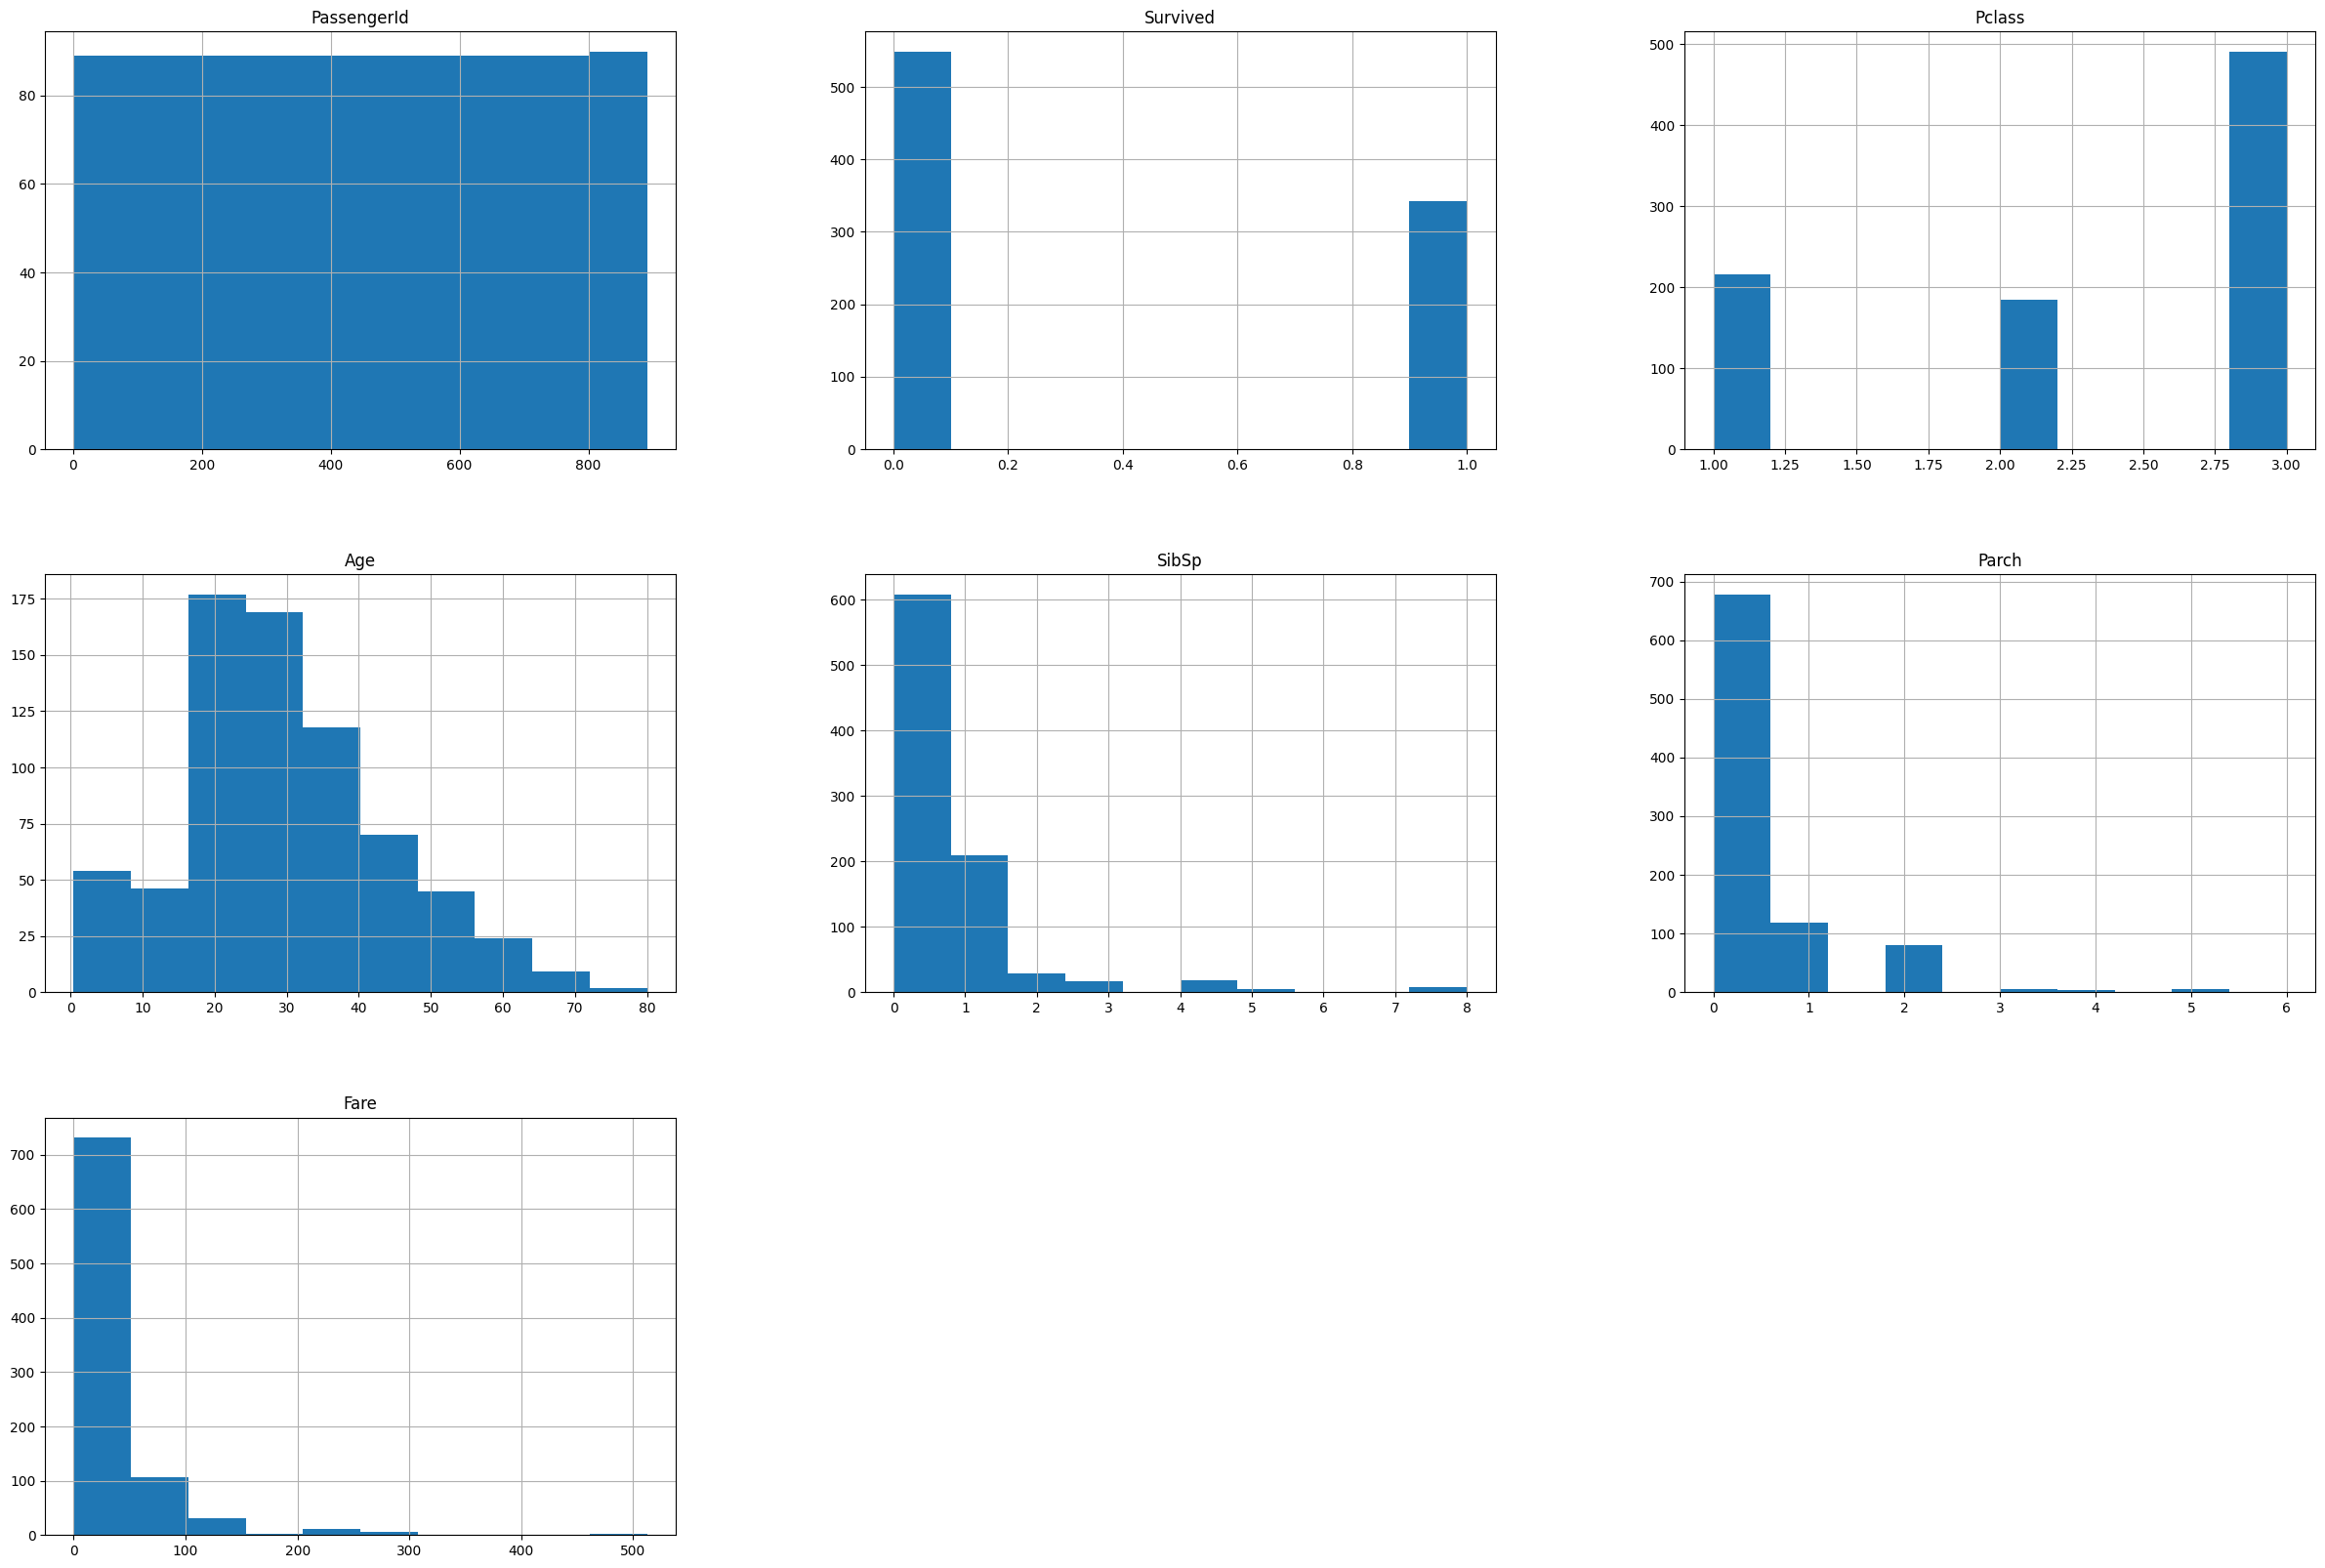

In [4]:
# histogram For Data 
data.hist(figsize=(30, 20));

In [5]:
# Cleanning Data And Test:
data = data.drop(["Name", "Cabin", "Ticket", "PassengerId"], axis=1)
test = test.drop(["Name", "Cabin", "Ticket", "PassengerId"], axis=1)

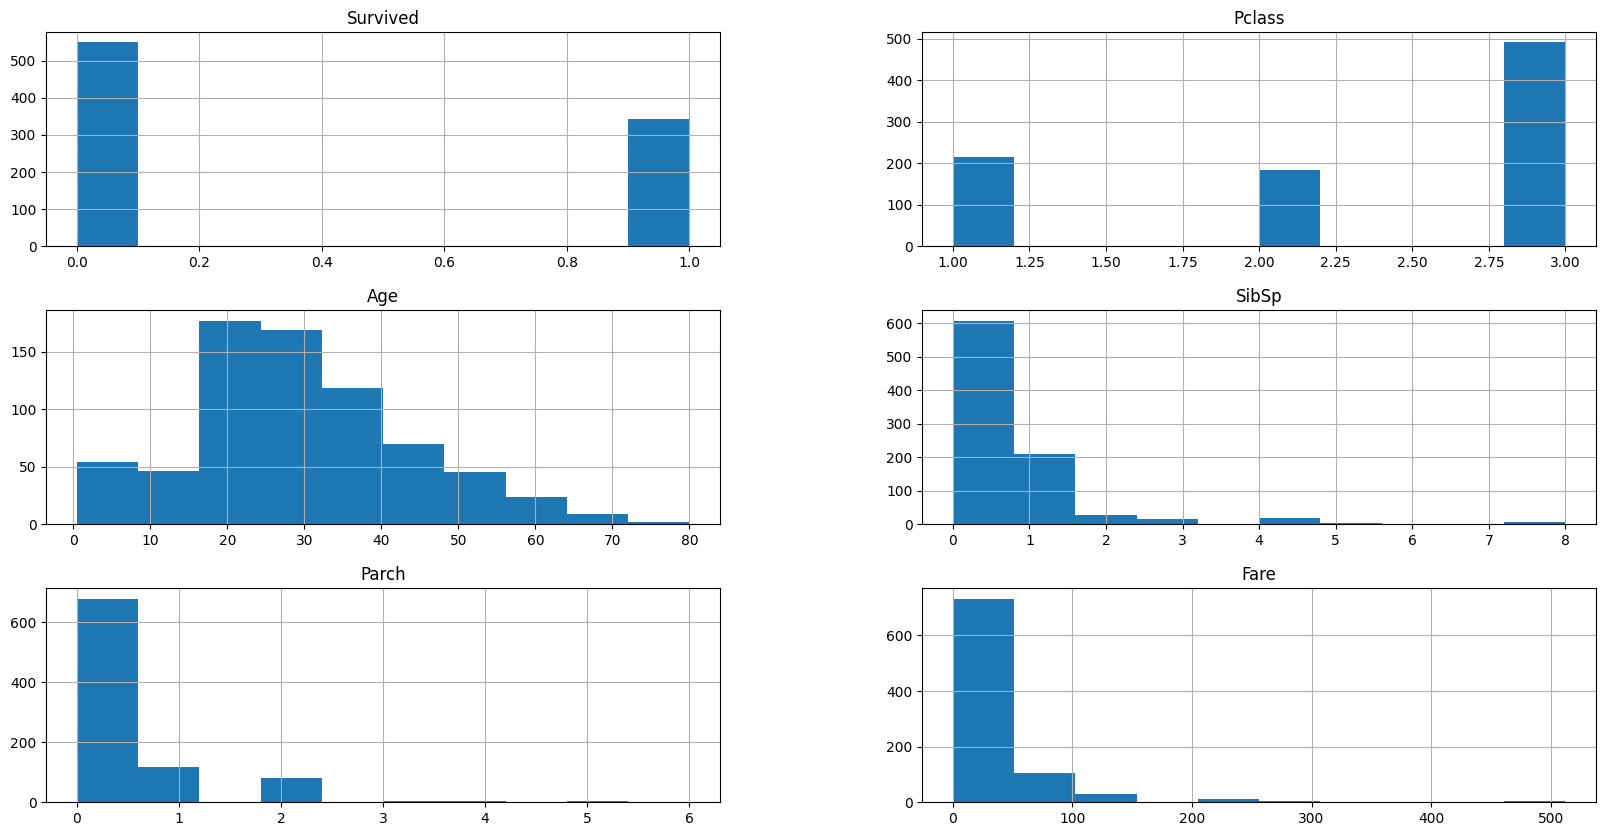

In [6]:
data.hist(figsize=(20,10));

In [7]:
data.Embarked.fillna("U", inplace= True)
test.Embarked.fillna("U", inplace= True)
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [8]:
# FillNan Value In Data 
cols = ["Age", "Fare"]
for col in cols:
    data[col].fillna(data[col].mean(), inplace=True)
    test[col].fillna(data[col].mean(), inplace=True)

In [9]:
data.drop(data[data["Fare"] > 250].index, axis=0, inplace=True)
data.drop(data[data["Parch"] > 5].index, axis=0, inplace=True)

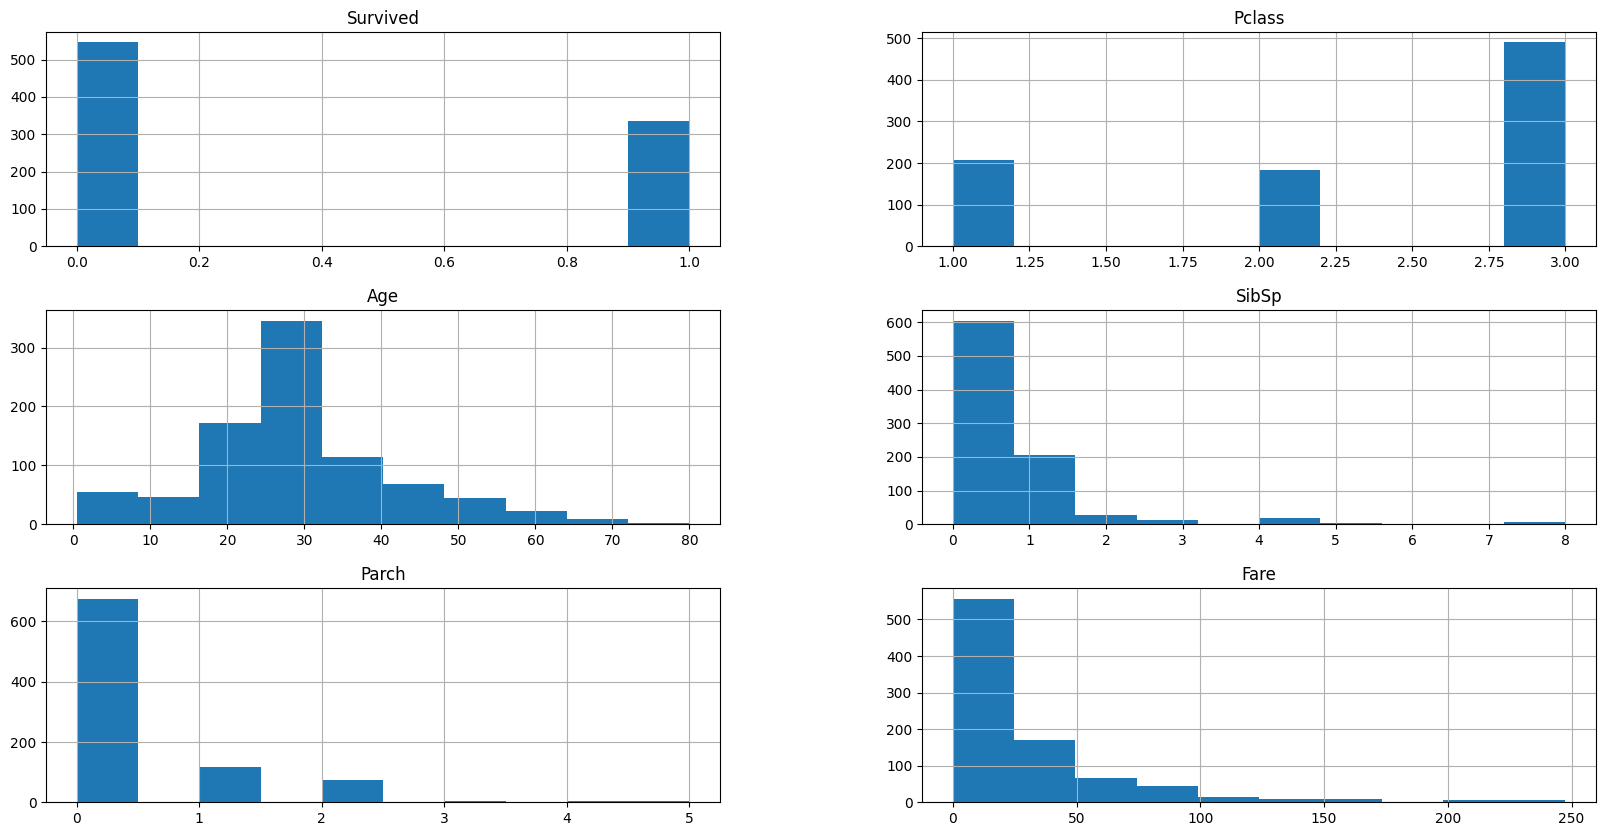

In [10]:
data.hist(figsize=(20,10));

In [11]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [14]:
data["SibSp"] = np.log(data["SibSp"])
test["SibSp"] = np.log(test["SibSp"])

C:\Users\osama\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
data["SibSp"] = data["SibSp"].replace([-np.inf, np.inf], 0)
test["SibSp"] = test["SibSp"].replace([-np.inf, np.inf], 0)

In [18]:
data["Fare"] = np.log(data["Fare"])
test["Fare"] = np.log(test["Fare"])

C:\Users\osama\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
data["Fare"] = data["Fare"].replace([-np.inf, np.inf], 0)
test["Fare"] = test["Fare"].replace([-np.inf, np.inf], 0)

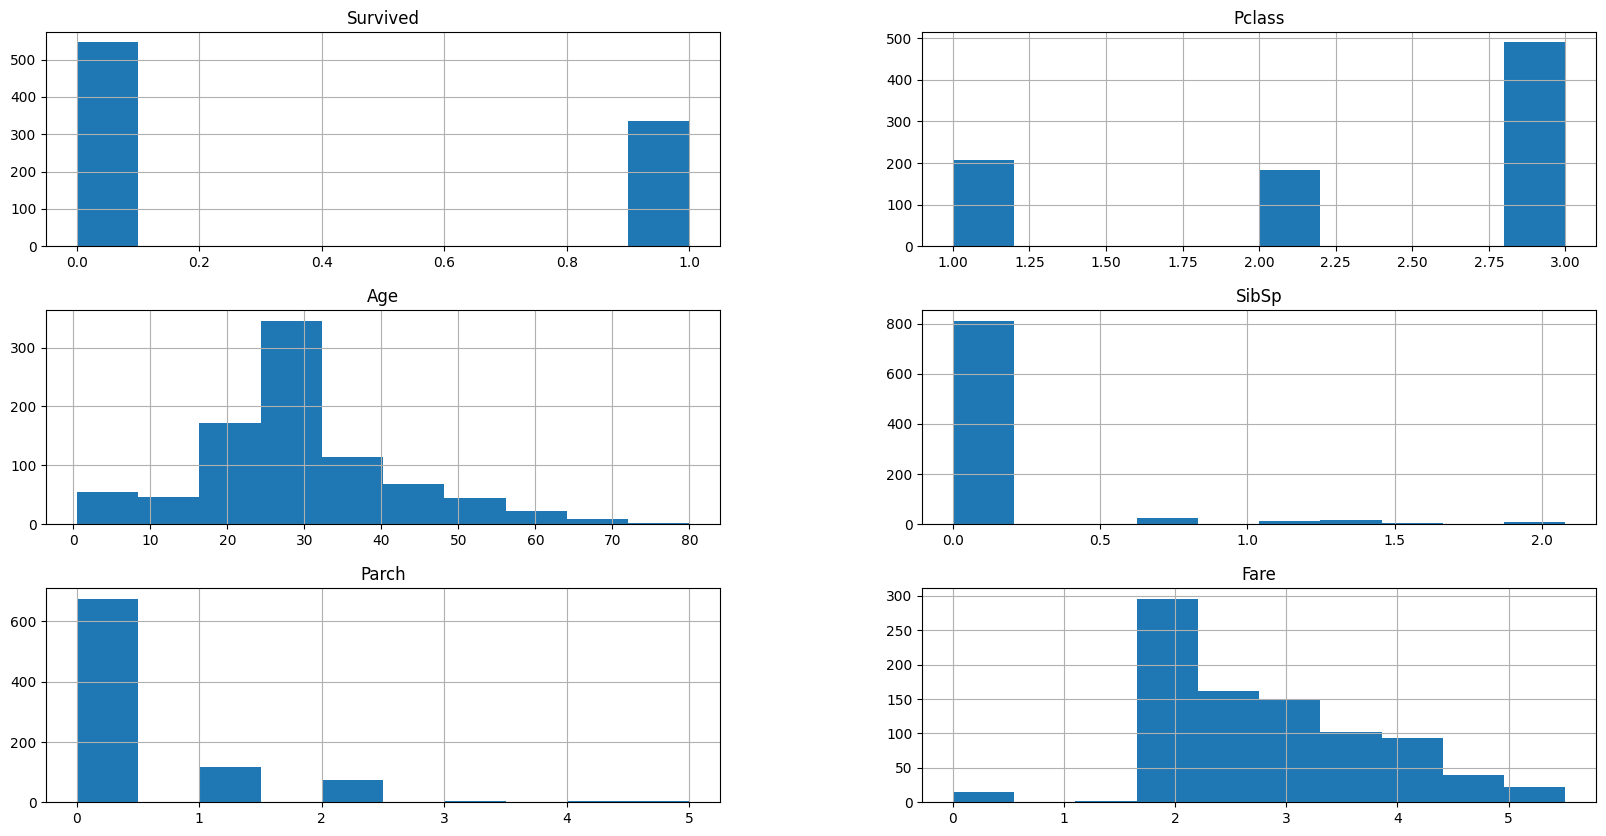

In [20]:
data.hist(figsize=(20,10));

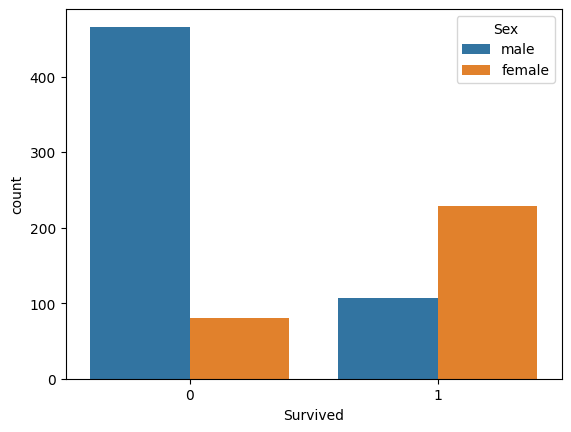

In [21]:
# Bar Plot For Relation Betwen Survived[1,0] ==> SEx[Male, Female]
sns.countplot(x="Survived", hue="Sex", data=data);

In [22]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500000,0.0,0,2.057860,Q
1,3,female,47.000000,0.0,0,1.945910,S
2,2,male,62.000000,0.0,0,2.270836,Q
3,3,male,27.000000,0.0,0,2.159003,S
4,3,female,22.000000,0.0,1,2.508582,S
...,...,...,...,...,...,...,...
413,3,male,29.699118,0.0,0,2.085672,S
414,1,female,39.000000,0.0,0,4.690430,C
415,3,male,38.500000,0.0,0,1.981001,S
416,3,male,29.699118,0.0,0,2.085672,S


In [23]:
# Label Encoding ==> ["Sex", "Embarked"]
la = LabelEncoder()
col_s = ["Sex", "Embarked"]
for col in col_s:
    data[col] = la.fit_transform(data[col])
    test[col] = la.fit_transform(test[col])
    print(la.classes_)
data

['female' 'male']
['C' 'Q' 'S']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,0.0,0,1.981001,2
1,1,1,0,38.000000,0.0,0,4.266662,0
2,1,3,0,26.000000,0.0,0,2.070022,2
3,1,1,0,35.000000,0.0,0,3.972177,2
4,0,3,1,35.000000,0.0,0,2.085672,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0.0,0,2.564949,2
887,1,1,0,19.000000,0.0,0,3.401197,2
888,0,3,0,29.699118,0.0,2,3.154870,2
889,1,1,1,26.000000,0.0,0,3.401197,0


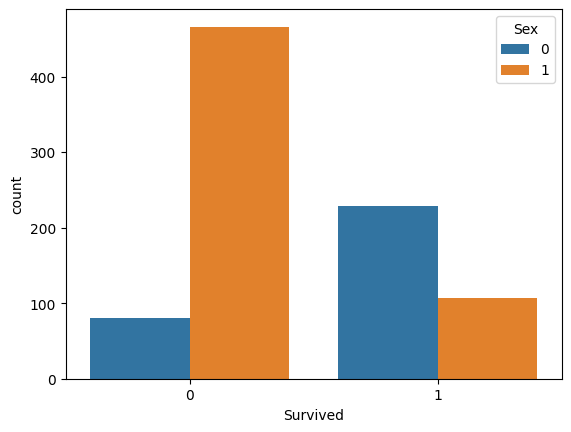

In [24]:
# Bar Plot For Relation Betwen Survived[1,0] ==> SEx[Male, Female]
sns.countplot(x="Survived", hue="Sex", data=data);

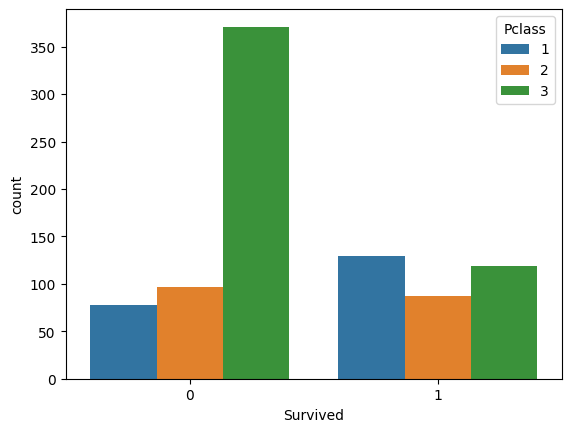

In [25]:
# Bar Plot For Relation Betwen Survived[1,0] ==> Pcalss[1, 2, 3]

sns.countplot(x="Survived", hue="Pclass", data=data);

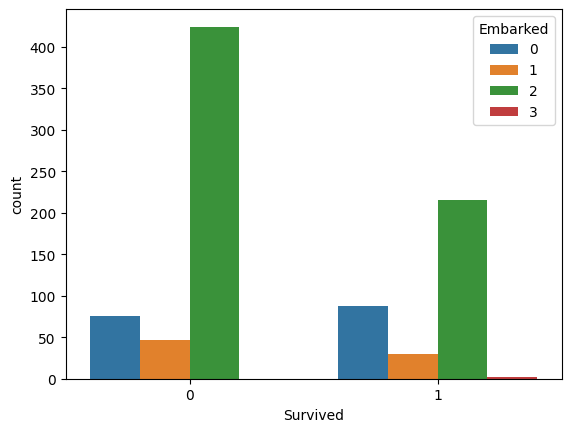

In [26]:
# Bar Plot For Relation Betwen Survived[1,0] ==> Embarked

sns.countplot(x="Survived", hue="Embarked", data=data);

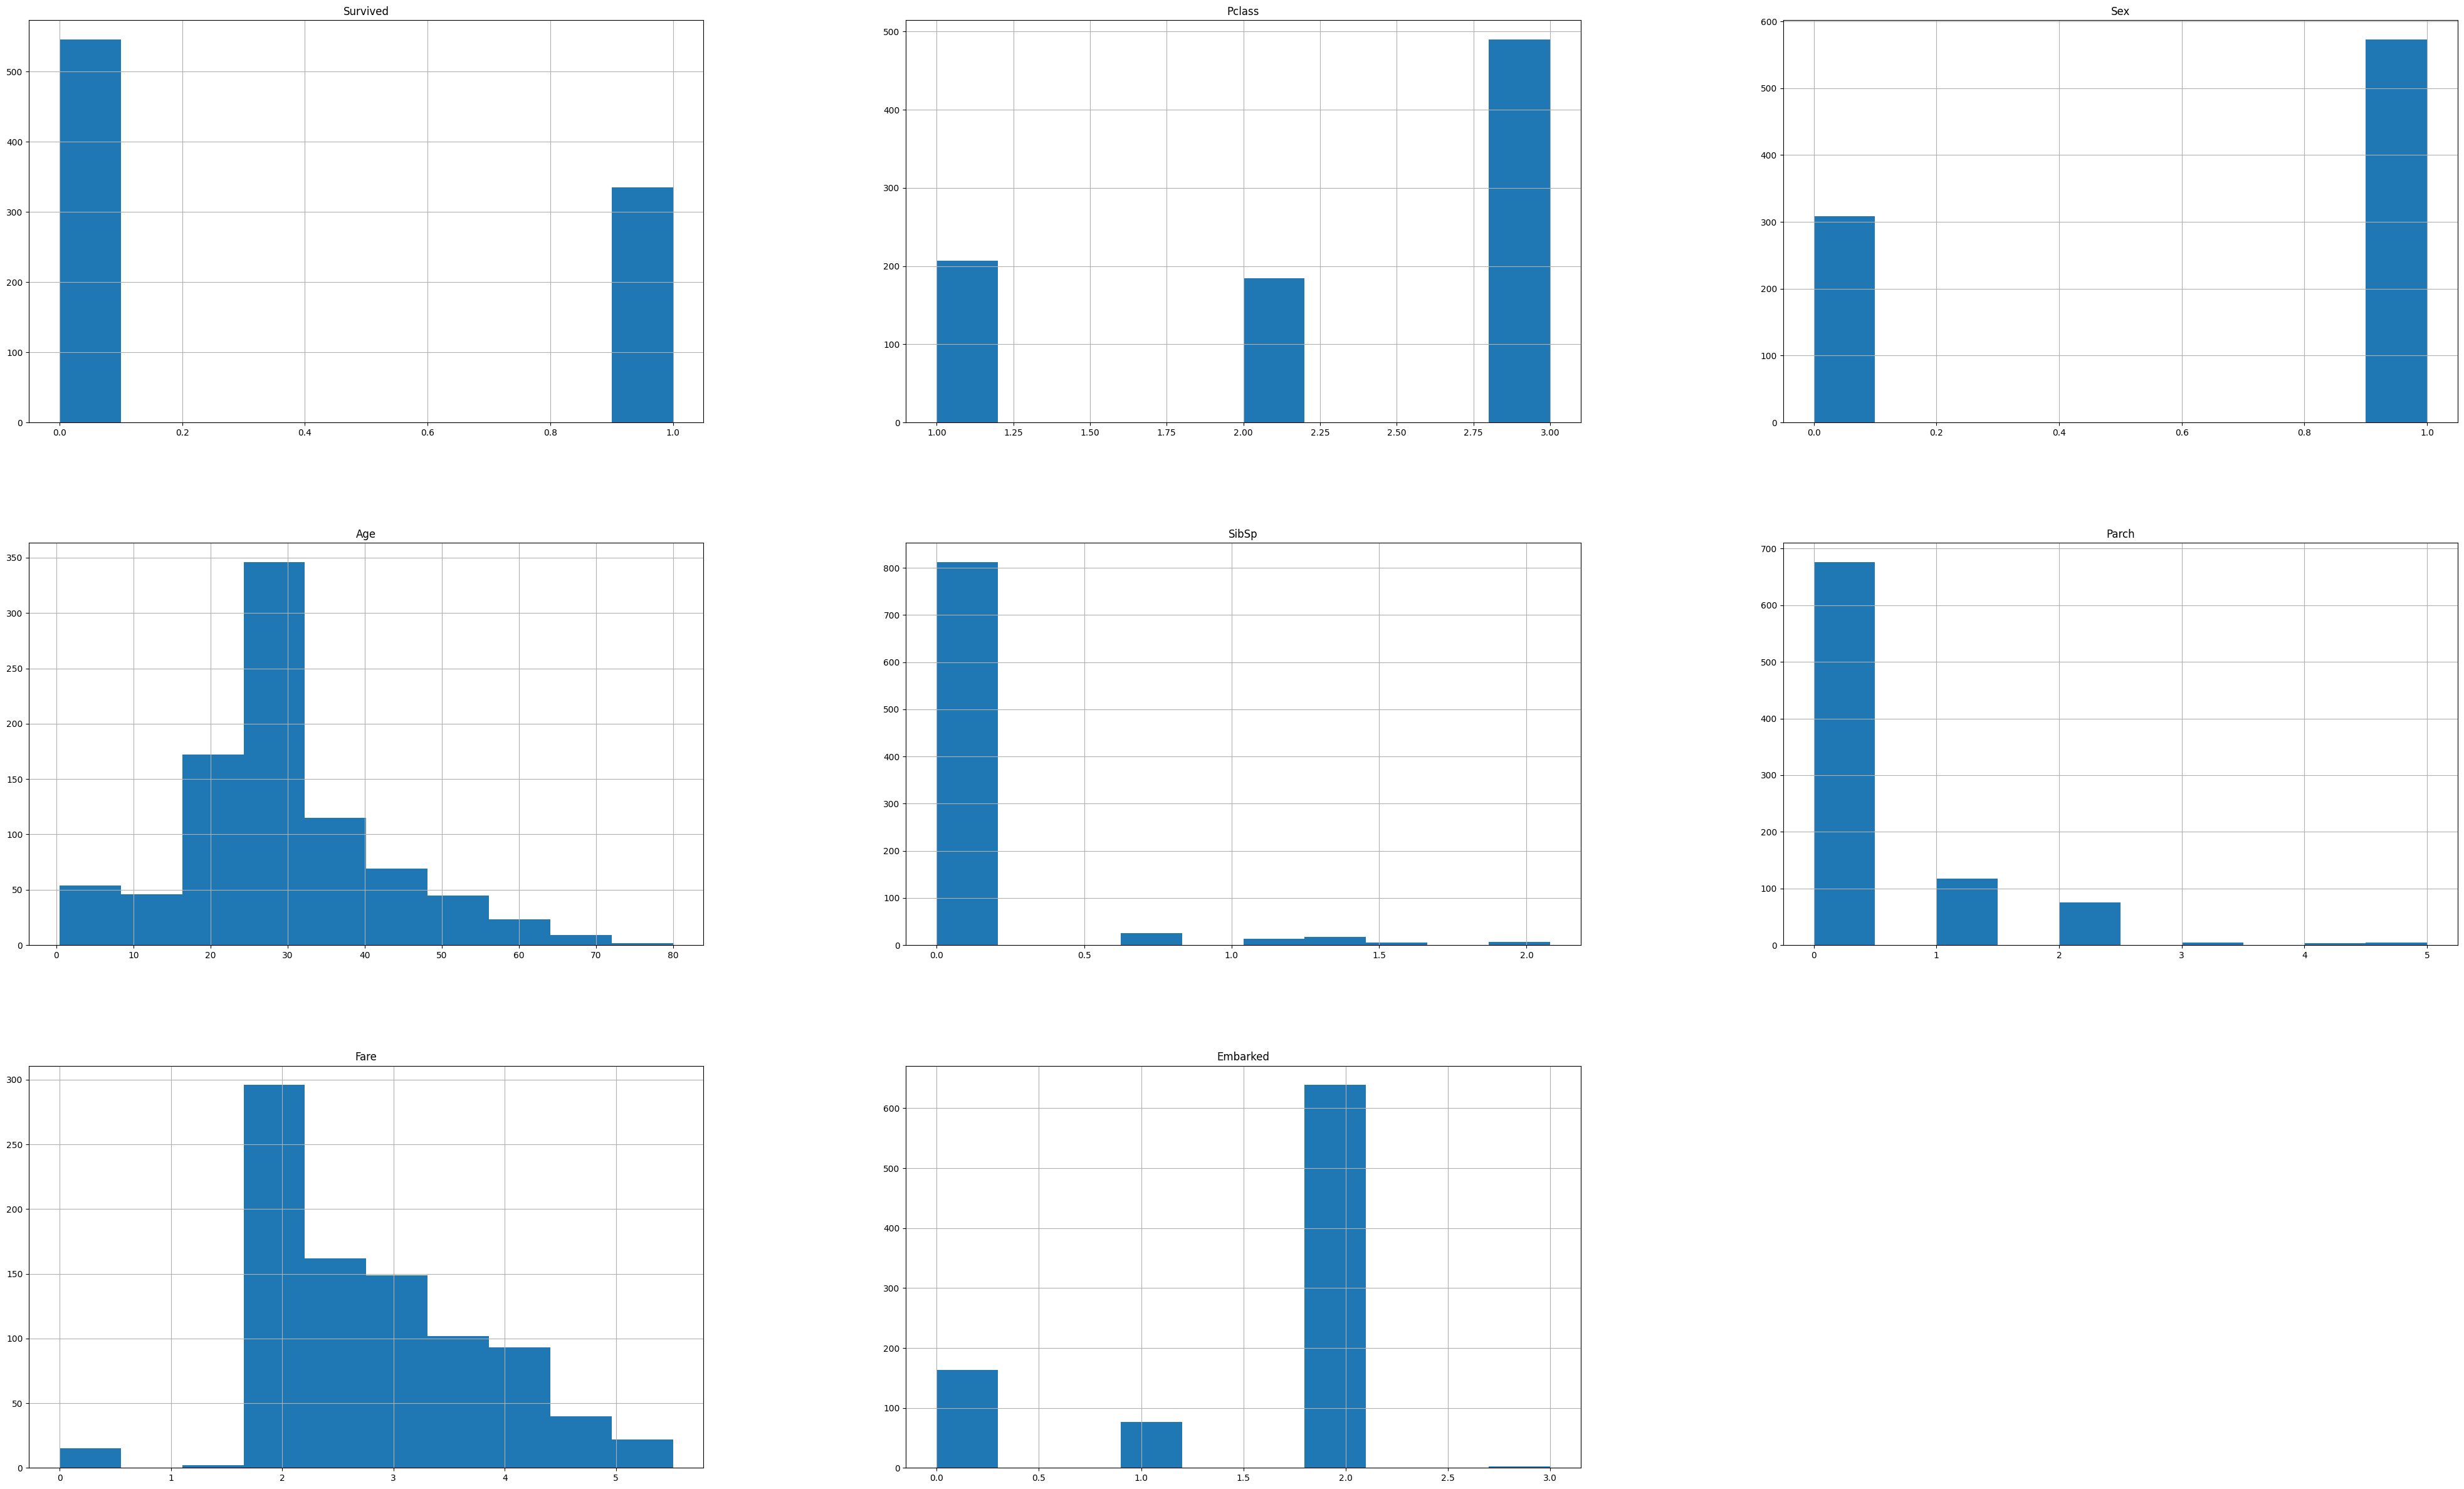

In [27]:
data.hist(figsize=(50, 30));

In [28]:
data.drop(data[data["Embarked"] > 2].index, axis=0, inplace=True)

In [29]:
# x == > Input
# Y == > Output

X = data.drop(["Survived"], axis=1)
Y = data["Survived"]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

# Model 1 ==> LogisticRegression

In [31]:
model = LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)

print(f"The Training score ==> {model.score(x_train, y_train)}")
print(f"The Testing score ==> {model.score(x_test, y_test)}")

The Training score ==> 0.8065040650406504
The Testing score ==> 0.803030303030303


In [32]:
predict = model.predict(x_test)
accuracy_score(y_test, predict)

0.803030303030303

# Model 2 ==> RandomForestClassifier

In [33]:
# model2
# Random Forest

model1 = RandomForestClassifier(n_estimators=500,
                                max_depth=20, 
                                max_features=2, 
                                min_samples_leaf=5,)
model1.fit(x_train, y_train)

print(f"The Training score ==> {model1.score(x_train, y_train)}")
print(f"The Testing score ==> {model1.score(x_test, y_test)}")
print("- " * 20)

The Training score ==> 0.8617886178861789
The Testing score ==> 0.8446969696969697
- - - - - - - - - - - - - - - - - - - - 


# Model 3 ==> AdaBoostClassifier

In [37]:
Adaboost_reg = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                                        min_samples_leaf=5),
                              n_estimators=200,
                              learning_rate=1)


Adaboost_reg.fit(x_train, y_train)

print(f"The predict Score Train is ==> {Adaboost_reg.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {Adaboost_reg.score(x_test, y_test)}")

C:\Users\osama\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


The predict Score Train is ==> 0.9853658536585366
%----------------------------------------------------------%
The predict Score Test is ==> 0.8295454545454546


# Model 4 ==> XGBClassifier

In [43]:
model_xgb = xgb.XGBClassifier(n_estimators=60, max_depth=60000,
                             learning_rate=0.1,
                             min_child_weight=4, random_state=42)
                             
model_xgb.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_xgb.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_xgb.score(x_test, y_test)}")

The predict Score Train is ==> 0.8894308943089431
%----------------------------------------------------------%
The predict Score Test is ==> 0.8446969696969697


# Model 4 ==> Nerual Network

In [51]:
from keras.utils import to_categorical

In [52]:
label = to_categorical(Y, 2)

In [54]:
X = data.drop(["Survived"], axis=1)
Y = data["Survived"]

x_train1, x_test1, y_train1, y_test1 = train_test_split(X, label, train_size=0.8, random_state=42)

In [65]:
model_nn = k.models.Sequential([
    k.layers.Dense(512, activation="relu"),
    k.layers.Dense(128, activation="relu"),
    k.layers.Dense(256, activation="relu"),
    k.layers.Dense(128, activation="relu"),
    k.layers.Dense(64, activation="relu"),
    k.layers.Dense(32, activation="relu"),
    k.layers.Dense(16, activation="relu"),
    k.layers.Dense(2, activation="softmax")
])

model_nn.compile(optimizer="adam", loss=k.losses.CategoricalFocalCrossentropy(), metrics=["accuracy"])

In [74]:
history = model_nn.fit(x_train1, y_train1, epochs=1000, validation_data=(x_test1, y_test1), validation_split=0.2)

Epoch 1/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.0248 - accuracy: 0.8293 - val_loss: 0.0368 - val_accuracy: 0.7841
Epoch 2/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.8236 - val_loss: 0.0304 - val_accuracy: 0.8011
Epoch 3/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.8421 - val_loss: 0.0368 - val_accuracy: 0.7898
Epoch 4/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.8222 - val_loss: 0.0323 - val_accuracy: 0.7955
Epoch 5/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.8350 - val_loss: 0.0338 - val_accuracy: 0.7955
Epoch 6/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.8279 - val_loss: 0.0340 - val_accuracy: 0.8125
Epoch 7/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.8378 - val_loss: 0.0348 - val_accuracy: 0.7614
Epoch 

22/22 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.8478 - val_loss: 0.0402 - val_accuracy: 0.7955
Epoch 59/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.8606 - val_loss: 0.0464 - val_accuracy: 0.7898
Epoch 60/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.8478 - val_loss: 0.0408 - val_accuracy: 0.7898
Epoch 61/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.8620 - val_loss: 0.0451 - val_accuracy: 0.7727
Epoch 62/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.8720 - val_loss: 0.0515 - val_accuracy: 0.7841
Epoch 63/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.8506 - val_loss: 0.0389 - val_accuracy: 0.7614
Epoch 64/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.8407 - val_loss: 0.0448 - val_accuracy: 0.7727
Epoch 65/1000

22/22 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.8805 - val_loss: 0.0622 - val_accuracy: 0.7670
Epoch 116/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.8791 - val_loss: 0.0565 - val_accuracy: 0.7841
Epoch 117/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.8734 - val_loss: 0.0683 - val_accuracy: 0.7670
Epoch 118/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.8649 - val_loss: 0.0599 - val_accuracy: 0.7841
Epoch 119/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.8777 - val_loss: 0.0647 - val_accuracy: 0.7841
Epoch 120/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.8791 - val_loss: 0.0649 - val_accuracy: 0.7784
Epoch 121/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.8748 - val_loss: 0.0691 - val_accuracy: 0.7727
Epoch 1

Epoch 172/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.8862 - val_loss: 0.0715 - val_accuracy: 0.7727
Epoch 173/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.8947 - val_loss: 0.0737 - val_accuracy: 0.7614
Epoch 174/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.8862 - val_loss: 0.0820 - val_accuracy: 0.7670
Epoch 175/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.8791 - val_loss: 0.0673 - val_accuracy: 0.7841
Epoch 176/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.8777 - val_loss: 0.0736 - val_accuracy: 0.7898
Epoch 177/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.8848 - val_loss: 0.0776 - val_accuracy: 0.7784
Epoch 178/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.8862 - val_loss: 0.0781 - val_accuracy:

Epoch 229/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9018 - val_loss: 0.1043 - val_accuracy: 0.7727
Epoch 230/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.8734 - val_loss: 0.0549 - val_accuracy: 0.7386
Epoch 231/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.8549 - val_loss: 0.0473 - val_accuracy: 0.7784
Epoch 232/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.8734 - val_loss: 0.0593 - val_accuracy: 0.7670
Epoch 233/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.8777 - val_loss: 0.0567 - val_accuracy: 0.7898
Epoch 234/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.8848 - val_loss: 0.0502 - val_accuracy: 0.7898
Epoch 235/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.8862 - val_loss: 0.0600 - val_accuracy:

Epoch 286/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9061 - val_loss: 0.0947 - val_accuracy: 0.7727
Epoch 287/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9061 - val_loss: 0.1030 - val_accuracy: 0.7614
Epoch 288/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.8962 - val_loss: 0.0985 - val_accuracy: 0.7670
Epoch 289/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9004 - val_loss: 0.0962 - val_accuracy: 0.7614
Epoch 290/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9061 - val_loss: 0.1050 - val_accuracy: 0.8011
Epoch 291/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9075 - val_loss: 0.0911 - val_accuracy: 0.7784
Epoch 292/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9004 - val_loss: 0.1091 - val_accuracy:

Epoch 343/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.8876 - val_loss: 0.0951 - val_accuracy: 0.8125
Epoch 344/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9018 - val_loss: 0.1041 - val_accuracy: 0.7955
Epoch 345/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9147 - val_loss: 0.1102 - val_accuracy: 0.7670
Epoch 346/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9004 - val_loss: 0.1151 - val_accuracy: 0.7784
Epoch 347/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9033 - val_loss: 0.1003 - val_accuracy: 0.7727
Epoch 348/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9147 - val_loss: 0.1150 - val_accuracy: 0.7670
Epoch 349/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9018 - val_loss: 0.1274 - val_accuracy:

Epoch 400/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.8592 - val_loss: 0.0528 - val_accuracy: 0.7898
Epoch 401/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.8791 - val_loss: 0.0599 - val_accuracy: 0.7841
Epoch 402/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.8805 - val_loss: 0.0727 - val_accuracy: 0.7727
Epoch 403/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9004 - val_loss: 0.0820 - val_accuracy: 0.8011
Epoch 404/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9061 - val_loss: 0.0909 - val_accuracy: 0.7955
Epoch 405/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.8962 - val_loss: 0.0908 - val_accuracy: 0.7898
Epoch 406/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9047 - val_loss: 0.0909 - val_accuracy:

Epoch 457/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9090 - val_loss: 0.1285 - val_accuracy: 0.7898
Epoch 458/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9061 - val_loss: 0.1397 - val_accuracy: 0.7955
Epoch 459/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.8976 - val_loss: 0.1321 - val_accuracy: 0.7670
Epoch 460/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9075 - val_loss: 0.1380 - val_accuracy: 0.7727
Epoch 461/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9118 - val_loss: 0.1373 - val_accuracy: 0.7898
Epoch 462/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9203 - val_loss: 0.1413 - val_accuracy: 0.7670
Epoch 463/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9061 - val_loss: 0.1424 - val_accuracy:

Epoch 514/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9132 - val_loss: 0.1627 - val_accuracy: 0.7955
Epoch 515/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9047 - val_loss: 0.1373 - val_accuracy: 0.7614
Epoch 516/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.9004 - val_loss: 0.1122 - val_accuracy: 0.7955
Epoch 517/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.8905 - val_loss: 0.1007 - val_accuracy: 0.7841
Epoch 518/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9033 - val_loss: 0.1040 - val_accuracy: 0.8125
Epoch 519/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9090 - val_loss: 0.1127 - val_accuracy: 0.8011
Epoch 520/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9132 - val_loss: 0.1215 - val_accuracy:

Epoch 571/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9061 - val_loss: 0.1635 - val_accuracy: 0.7898
Epoch 572/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9118 - val_loss: 0.1481 - val_accuracy: 0.8011
Epoch 573/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9147 - val_loss: 0.1401 - val_accuracy: 0.7841
Epoch 574/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.8919 - val_loss: 0.1079 - val_accuracy: 0.7898
Epoch 575/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.8876 - val_loss: 0.0705 - val_accuracy: 0.7955
Epoch 576/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0167 - accuracy: 0.8933 - val_loss: 0.0814 - val_accuracy: 0.7955
Epoch 577/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.8862 - val_loss: 0.0990 - val_accuracy:

Epoch 628/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9132 - val_loss: 0.1322 - val_accuracy: 0.7727
Epoch 629/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9090 - val_loss: 0.1347 - val_accuracy: 0.8011
Epoch 630/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9118 - val_loss: 0.1437 - val_accuracy: 0.7898
Epoch 631/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9189 - val_loss: 0.1453 - val_accuracy: 0.8011
Epoch 632/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9175 - val_loss: 0.1533 - val_accuracy: 0.7898
Epoch 633/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9175 - val_loss: 0.1516 - val_accuracy: 0.7727
Epoch 634/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9203 - val_loss: 0.1480 - val_accuracy:

Epoch 685/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9203 - val_loss: 0.1318 - val_accuracy: 0.7898
Epoch 686/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9218 - val_loss: 0.1314 - val_accuracy: 0.7955
Epoch 687/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9175 - val_loss: 0.1364 - val_accuracy: 0.8068
Epoch 688/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9203 - val_loss: 0.1465 - val_accuracy: 0.7955
Epoch 689/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9175 - val_loss: 0.1420 - val_accuracy: 0.8011
Epoch 690/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9147 - val_loss: 0.1379 - val_accuracy: 0.7670
Epoch 691/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9104 - val_loss: 0.1350 - val_accuracy:

Epoch 742/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9175 - val_loss: 0.1686 - val_accuracy: 0.8011
Epoch 743/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9275 - val_loss: 0.1854 - val_accuracy: 0.7841
Epoch 744/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9203 - val_loss: 0.1776 - val_accuracy: 0.7841
Epoch 745/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.8947 - val_loss: 0.1388 - val_accuracy: 0.7841
Epoch 746/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.8962 - val_loss: 0.1232 - val_accuracy: 0.7443
Epoch 747/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9033 - val_loss: 0.0952 - val_accuracy: 0.7841
Epoch 748/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9189 - val_loss: 0.1090 - val_accuracy:

Epoch 799/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9289 - val_loss: 0.1284 - val_accuracy: 0.7955
Epoch 800/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9232 - val_loss: 0.1353 - val_accuracy: 0.8011
Epoch 801/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9289 - val_loss: 0.1451 - val_accuracy: 0.8011
Epoch 802/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9218 - val_loss: 0.1466 - val_accuracy: 0.7841
Epoch 803/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9132 - val_loss: 0.1372 - val_accuracy: 0.8011
Epoch 804/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9018 - val_loss: 0.1224 - val_accuracy: 0.7670
Epoch 805/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9061 - val_loss: 0.1308 - val_accuracy:

Epoch 856/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9189 - val_loss: 0.1459 - val_accuracy: 0.7898
Epoch 857/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9260 - val_loss: 0.1525 - val_accuracy: 0.8125
Epoch 858/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9203 - val_loss: 0.1385 - val_accuracy: 0.8011
Epoch 859/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9147 - val_loss: 0.1412 - val_accuracy: 0.8068
Epoch 860/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9218 - val_loss: 0.1475 - val_accuracy: 0.7727
Epoch 861/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9090 - val_loss: 0.1264 - val_accuracy: 0.8011
Epoch 862/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9189 - val_loss: 0.1360 - val_accuracy:

Epoch 913/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9132 - val_loss: 0.0917 - val_accuracy: 0.7784
Epoch 914/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9260 - val_loss: 0.1054 - val_accuracy: 0.7955
Epoch 915/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9203 - val_loss: 0.1085 - val_accuracy: 0.7841
Epoch 916/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9218 - val_loss: 0.1183 - val_accuracy: 0.7841
Epoch 917/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9289 - val_loss: 0.1315 - val_accuracy: 0.7784
Epoch 918/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9018 - val_loss: 0.1212 - val_accuracy: 0.7841
Epoch 919/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9075 - val_loss: 0.1137 - val_accuracy:

Epoch 970/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9203 - val_loss: 0.1923 - val_accuracy: 0.8125
Epoch 971/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9218 - val_loss: 0.1830 - val_accuracy: 0.7898
Epoch 972/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9289 - val_loss: 0.1858 - val_accuracy: 0.7955
Epoch 973/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9303 - val_loss: 0.1824 - val_accuracy: 0.8068
Epoch 974/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9303 - val_loss: 0.1999 - val_accuracy: 0.7841
Epoch 975/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9317 - val_loss: 0.1645 - val_accuracy: 0.8125
Epoch 976/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9189 - val_loss: 0.1599 - val_accuracy:

In [75]:
submition_test = model_nn.predict(test)

14/14 [==============================] - 0s 956us/step


In [76]:
submition_test = [np.argmax(i) for i in submition_test]
submition_test[0]

0

In [77]:
new_data_submiition = pd.DataFrame({"PassengerId": test_ID.values,
                                   "Survived": submition_test})

In [78]:
new_data_submiition.to_csv("D:\Pycharm\submition.csv", index=False)